## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
wine = datasets.load_wine()
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size = 0.25,random_state = 7)
clf = DecisionTreeClassifier(criterion = 'gini',min_samples_split=2,min_samples_leaf=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.911111111111


In [4]:
clf.feature_importances_

array([ 0.04431795,  0.        ,  0.        ,  0.0226112 ,  0.        ,
        0.01923522,  0.10276384,  0.        ,  0.        ,  0.26084273,
        0.        ,  0.12512269,  0.42510638])

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pdp

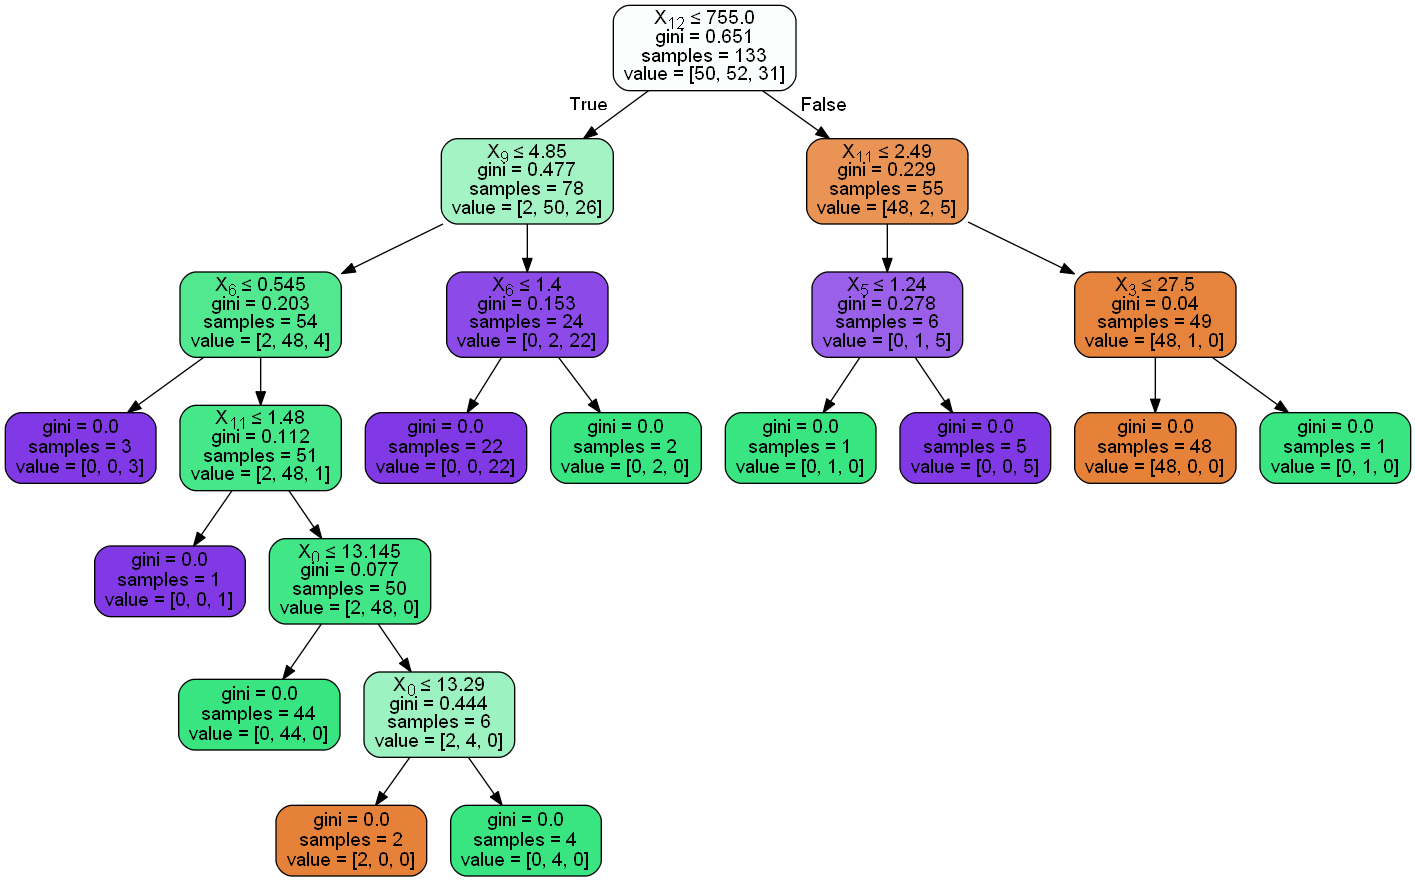

In [6]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pdp.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

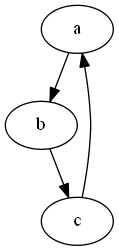

In [7]:
from IPython.display import display, Image
graph = pdp.graph_from_dot_data('digraph demo1{ a -> b -> c; c ->a; }')
display(Image(graph.create_png()))